In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import scipy.io as si         # for inputing matlab files
import numpy as np            # Linear Algebra tools
from random import shuffle    # for shuffling dataset
import pandas as pd           # for csv files and dataframes
import matplotlib.pyplot as plt  # for ploting graphs and curves

In [4]:
mat_x = si.loadmat('/content/drive/My Drive/Machine Learning Projects/Hyperspectral_Image_Classification_Project/Indian_Pines_Data/Indian_pines.mat')['indian_pines']        # shape 145*145*220
mat_y = si.loadmat('/content/drive/My Drive/Machine Learning Projects/Hyperspectral_Image_Classification_Project/Indian_Pines_Data/Indian_pines_gt.mat')['indian_pines_gt']  # shape 145*145

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Machine Learning Projects/Hyperspectral_Image_Classification_Project/Indian_Pines_Data/Indian_pines.mat'

In [ ]:
h, w, b = 145, 145, 220           # height,width and band of image
P_S = 5                           # patch size (window size)
oversampling = False              # Turn true to make distribution of samples across various classes to be uniform
no_of_patch = 2000                # if oversampling is true enter no of patches for each class

In [ ]:
x_np, y_np = np.array(mat_x), np.array(mat_y)
x, y = x_np.reshape(h,w,b), y_np.reshape(h,w)

In [ ]:
x = x.astype('float')
for i in range(b):
  x[:,:,i] /= np.max(x[:,:,i])

In [ ]:
pad_width = int( (P_S-1)/2 )
padded_x = np.pad(x,[(pad_width,pad_width),(pad_width,pad_width),(0,0)],'edge')

In [ ]:
X,Y = [],[]
for i in range(h):
  for j in range(w):
    if(y[i][j]!= 0):
      patch = padded_x[i:i+P_S,j:j+P_S,:]
      X.append(patch)
      Y.append(y[i][j]-1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.25,stratify=Y)

In [ ]:
u_c = np.unique(y_train,return_counts=True)
print(u_c)
plt.bar( u_c[0],u_c[1], align='center', alpha=0.5)
plt.title('Distribution of samples before resampling')
plt.show()

In [ ]:
output_classes = len(np.unique(y_np))-1
if(oversampling):
  classes = []
  for i in range(output_classes):
    classes.append([])
  for i in range(len(y_train)):
    classes[Y[i]].append(x_train[i])
  for c in range(output_classes):
    temp = classes[c]
    for i in range( int( no_of_patch / len(classes[c]) ) ):
      classes[c]+=temp
    shuffle(classes[c])
    classes[c] = classes[c][0:no_of_patch]
  x_train,y_train = [],[]
  for c in range(output_classes):
    x_train.extend( classes[c] )
    for i in range(len(classes[c])):
      y_train.append(c)
  randomize = np.arange(len(x_train))
  np.random.shuffle(randomize)
  x_train = [x_train[i] for i in randomize]
  y_train = [y_train[i] for i in randomize]

In [ ]:
print(x_train.shape)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([  35, 1071,  622,  178,  362,  547,   21,  358,   15,  729, 1841,
        445,  154,  949,  289,   70]))


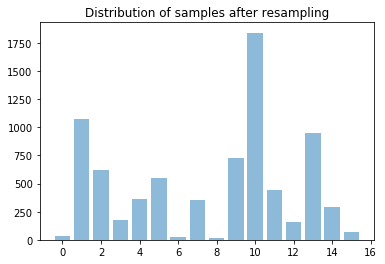

In [14]:
u_c = np.unique(y_train,return_counts=True)
print(u_c)
plt.bar( u_c[0],u_c[1], align='center', alpha=0.5)
plt.title('Distribution of samples after resampling')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [ ]:
patch1 = np.zeros((x_train.shape[0],P_S*P_S*b))
patch2 = np.zeros((x_test.shape[0],P_S*P_S*b))

for i in range(patch1.shape[0]):
  patch1[i,:] = x_train[i,:,:,:].flatten('C')
for i in range(patch2.shape[0]):
  patch2[i,:] = x_test[i,:,:,:].flatten('C')

x_train = patch1
x_test  = patch2

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
import time

**Best Model**

In [ ]:
sigma = 3
gamma = 1/(2 * sigma**2)

In [ ]:
clf_best = svm.SVC(kernel='rbf', gamma=gamma, C=30, decision_function_shape='ovr')

In [23]:
clf_best.fit(x_train, y_train)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05555555555555555,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = clf_best.predict(x_test)

In [25]:
results = confusion_matrix(y_test,y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[ 10   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0 351   0   0   0   0   0   0   0   6   0   0   0   0   0   0]
 [  0   1 202   0   0   0   0   0   0   0   3   2   0   0   0   0]
 [  0   0   0  59   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 121   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 183   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   1   1   0   0   0   0   0   0 241   0   0   0   0   0   0]
 [  0   3   1   0   0   0   0   0   0   1 609   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 148   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  51   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 315   1   0]
 [  0   0   0   0   0   0   0   0   0   0  

**Classified Image**

In [ ]:
# Function to extract patche at h_index,w_index 

def patch_at_index(h_index,w_index):
  patch = padded_x[h_index:h_index+P_S,w_index:w_index+P_S,:]
  patch = patch.flatten('C')
  patch = patch.reshape(1,patch.shape[0])
  return patch

In [27]:
y_hat = np.zeros((h,w),dtype=int)

for i in range(h):
  for j in range(w):
    if(i%2==0 and j==0):
      print(i)
    patch = patch_at_index(i,j)
    y_hat[i][j] =  clf_best.predict(patch) +1

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144


In [28]:
!pip install spectral

ImageView object:
  Interpolation       :  <default>

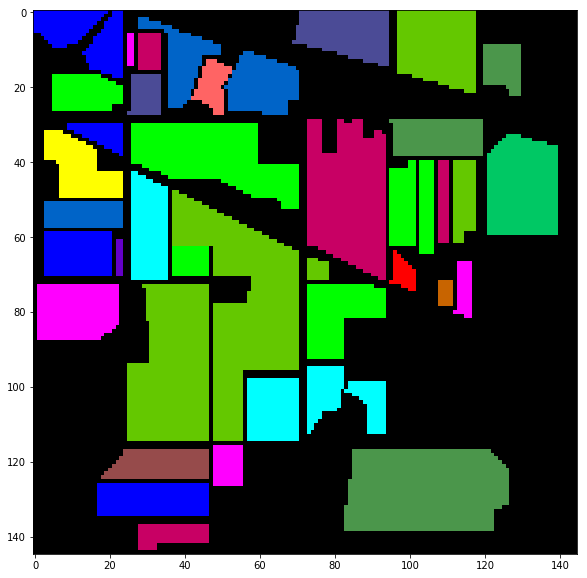

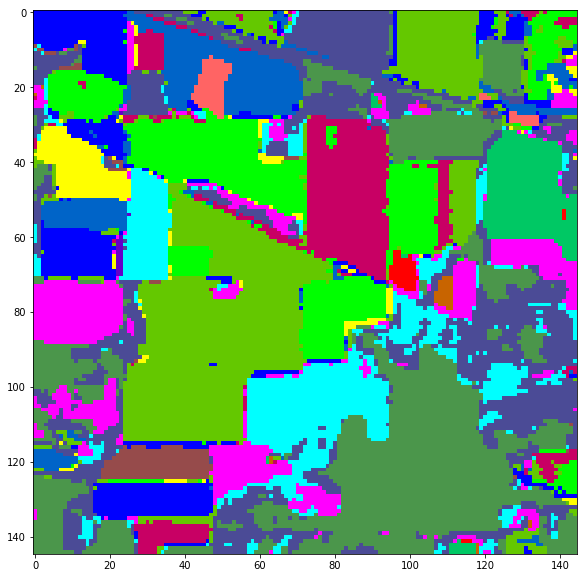

In [36]:
import spectral
spectral.imshow(classes = y,figsize=(10,10))
spectral.imshow(classes = y_hat,figsize=(10,10))